<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
#boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Q1: For the 'Median value of owner-occupied homes' provide a boxplot

Text(0.5, 1.0, 'Owner-occupied homes')

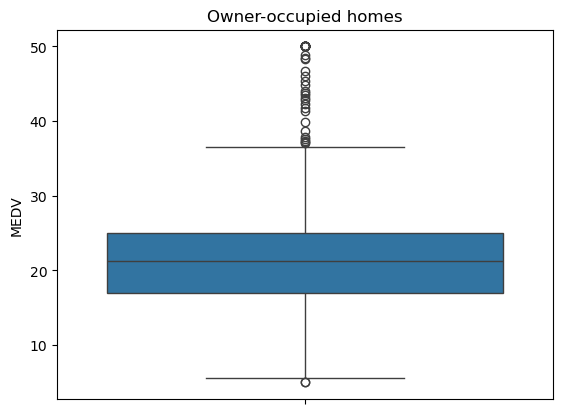

In [46]:
bx = sns.boxplot(y = 'MEDV', data = boston_df)
bx.set_title('Owner-occupied homes')

The above chart shows the median value for the variable MEDV among with outliers

## Q2: Provide a histogram for the Charles River variable

Text(0.5, 1.0, 'Number of homes near the Charles River')

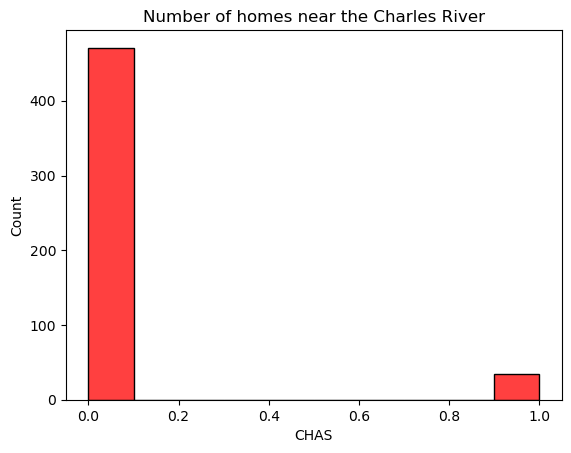

In [48]:
hs = sns.histplot(x = 'CHAS', data = boston_df, color = 'red')
hs.set_title('Number of homes near the Charles River')

The above chart shows that the majority of homes in the area are not near the Charles River

## Q3: Provide a boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

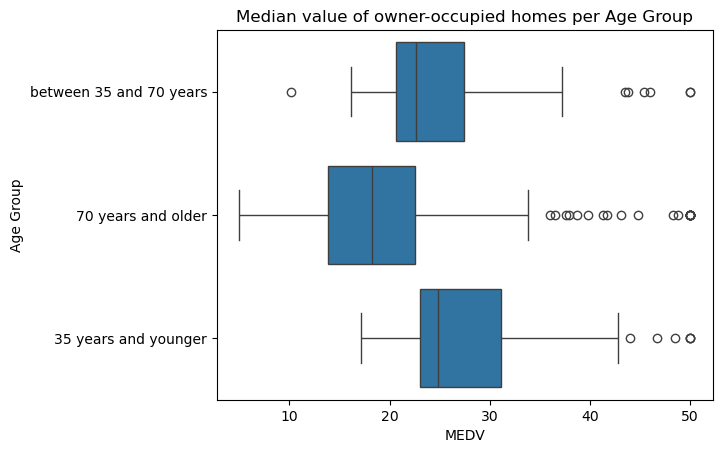

In [49]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'

ax3 = sns.boxplot(x = 'MEDV', y = 'Age Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes per Age Group')

The above chart shows that on average, the median value of owner occupied homes is higher when the Age is lower

## Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

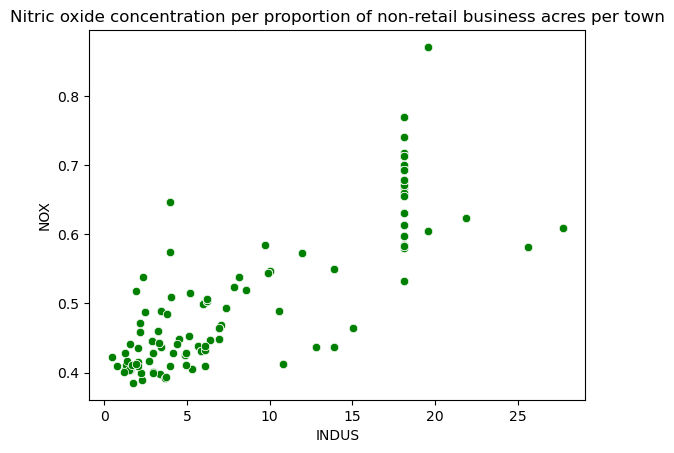

In [53]:
sp = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df, color = 'green')
sp.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

The values in the bottom-left section of the scatter plot indicates a strong correlation between low Nitric oxide concentration and low proportion of non-retail business acres per town.

Broadly speaking, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

## Q5: Create a histogram for the pupil to teacher ratio variable

hs1 = sns.histplot(x = 'PTRATIO', data = boston_df, color = 'purple')
hs1.set_title('Pupil to teacher ratio per town')

# Tests for Statistics

## Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis

H0: µ1=µ2 (There is no difference in median value of houses if it is bounded by the Charles river)

H1: µ1≠µ2 (There is difference in median value of houses if it is bounded by the Charles river)

α = 0.05

In [58]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Result

Since the p-value is less than alpha value 0.05, we can reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on boundness by Charles river

## Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis

H0: µ1=µ2=µ3 (the median values are equal) 

H1: At least one of the medians differ from the others.

α = 0.05

In [66]:
boston_df.loc[(boston_df['AGE'] <= 45), 'Age group'] = '45 and less'
boston_df.loc[(boston_df['AGE'] > 45)&(boston_df['AGE'] < 77), 'Age group'] = 'between 45 and 77'
boston_df.loc[(boston_df['AGE'] >= 94), 'Age group'] = '94 and more'

In [67]:
scipy.stats.levene(boston_df[boston_df['Age group'] == '45 and less']['MEDV'],
                   boston_df[boston_df['Age group'] == 'between 45 and 77']['MEDV'], 
                   boston_df[boston_df['Age group'] == '94 and more']['MEDV'], 
                   center='mean')

LeveneResult(statistic=0.3229214633015032, pvalue=0.7242313129163366)

Since the p-value is greater than 0.05, we fail to reject the null hypothesis as there is significant evidence that at least one of the means differ, hence we see that there is a difference in Median values of houses (MEDV) for at least for one group of proportion of owner occupied units built prior to 1940.

## Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis

H0: Nitric oxide concentrations is not correlated with non-retail business acres per town

H1: Nitric oxide concentrations is correlated with non-retail business acres per town

In [69]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

As the Pearson Coefficient is 0.76365 and p-value less than 0.05, we can reject our Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town

## Q4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [70]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        12:48:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given a p value of < 0.05 there is evidence of correlation between distance to the five Boston employment centres and median value of owner occupied homes